## How to get rich from Seattle Airbnb


In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import matplotlib.style as style

import plotly.figure_factory as ff
import plotly.graph_objects as go




In [24]:
listings = pd.read_csv('archive/listings.csv')
calendardf = pd.read_csv('archive/calendar.csv')
reviews = pd.read_csv('archive/reviews.csv')

In [25]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [26]:
calendardf.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [27]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


In [28]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


 we will see if there is any miss data or not


# Here is the three question realted business

First : What are the different prices for the various neighborhoods of Seattle?

Second : How does seasonality affect prices?


Third : What other factors affet flat prices ?

<AxesSubplot:>

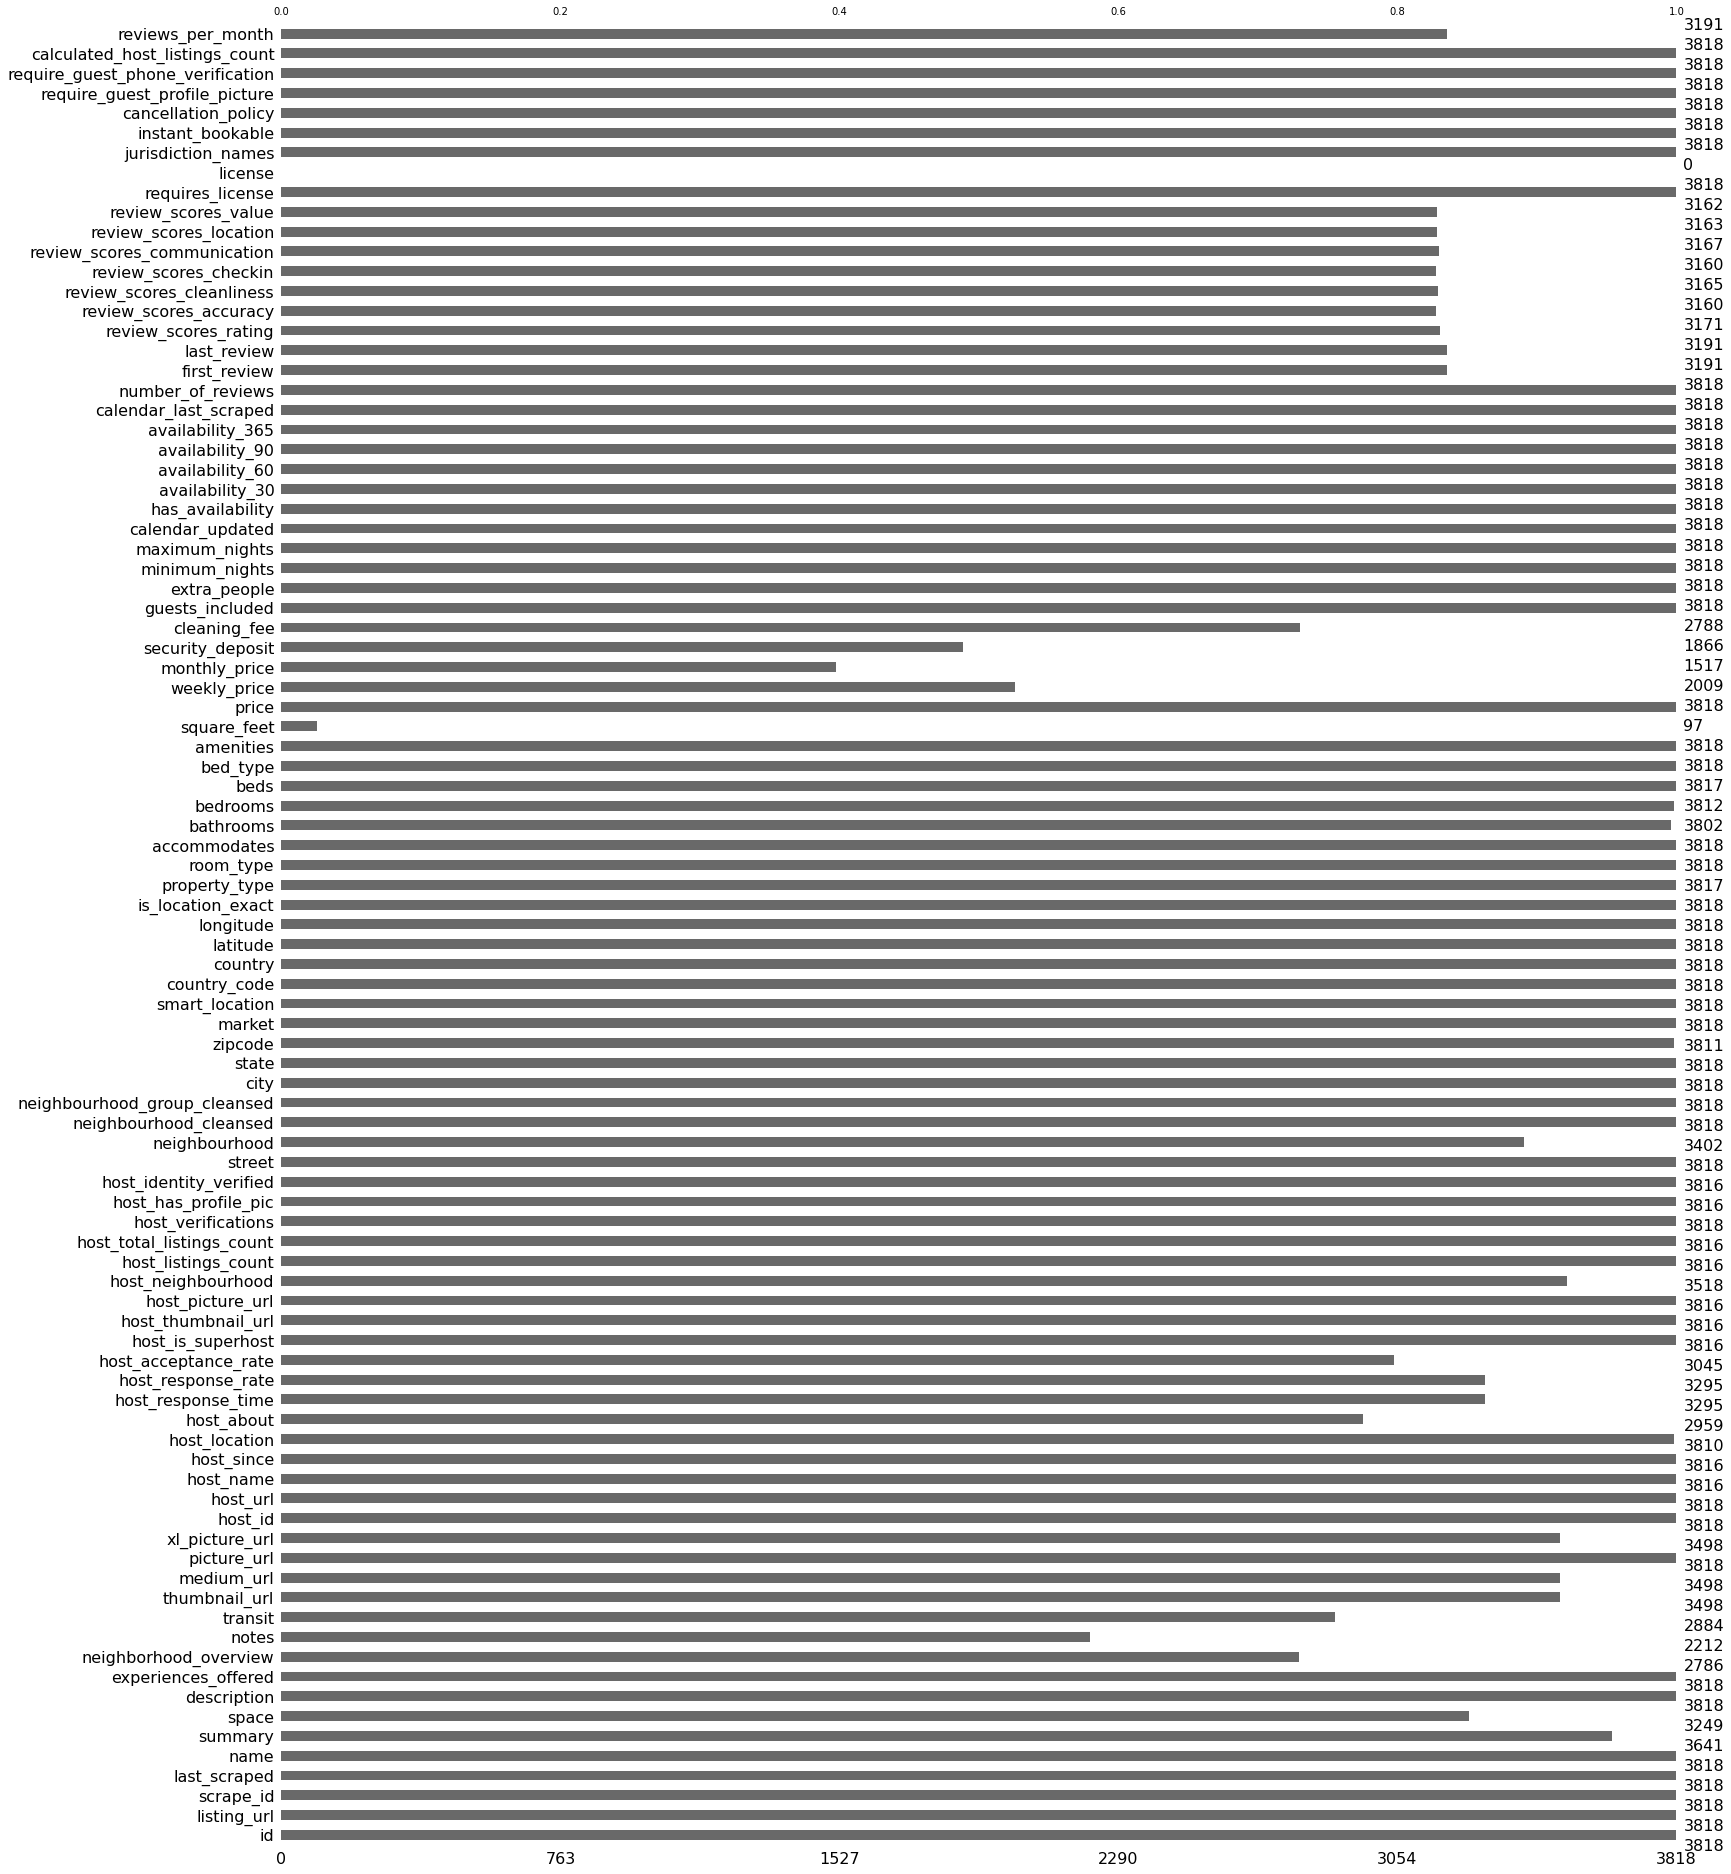

In [29]:
msno.bar(listings)

From the above plot we see that there is no data available for licence and square feet and also we have a lot of missing data for monthly price, weekly price and security deposit. We will not use this data as it will skew our findings. Other variables like number of Beds, Bedrooms will be imputed using mode in the next steps bellow.

<AxesSubplot:>

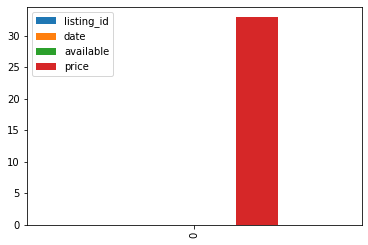

In [30]:
calendar_missing = pd.DataFrame([calendardf.isnull().mean()*100])
calendar_missing.plot.bar()

There is 34% of data missing for the price column

In [31]:
#merge datasets so we will change id in listings data set to id 
listings = listings.rename(index=str, columns={"id": "listing_id"})
df = pd.merge(calendardf, listings, on = 'listing_id')

In [32]:
#drop columns that no need it 
columns_to_drop = ['available', 'host_id','host_location',
                   'host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary',
                   'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood',
                   'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
                   'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about',
                   'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code',
                   'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability',
                   'availability_30',
                   'availability_60', 'availability_90', 'availability_365',
                   'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license',
                   'jurisdiction_names', 'price_y',
                  'reviews_per_month']
    
df = df.drop(columns = columns_to_drop)

In [33]:
#Remove rows where price_x == nan
df = df.dropna(subset=['price_x'])

In [34]:
#fill missing values with mean value for host_listings_count
df['host_listings_count'].fillna(df['host_listings_count'].mean(),
                                   inplace = True)

In [35]:
#fill in missing values for bathrooms, bedrooms and beds with mode
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])

In [36]:
 #fill missing values for review scores columns
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy',
                           'review_scores_cleanliness','review_scores_checkin',
                           'review_scores_communication', 
                           'review_scores_location', 'review_scores_value']
for column in review_scores_columns:
        df[column].fillna(df[column].mean(), inplace = True)

In [37]:
#convert price to number and drop the price_x column
df['price'] = df['price_x'].astype(str)
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")
df = df.drop(columns = ['price_x'])

In [38]:
def get_month_from_date(row):
 
  #Get month from date represented as a string
  
  return int(row['date'].split('-')[1])
    

In [39]:
df['month'] = df.apply(lambda row: get_month_from_date(row),axis=1)

## First Question: How do the prices of flats differ for various neighbourhoods in Seattle?

In [40]:
#Get a dataframe of price and neibgourhood
Price_by_Neighbourhoud_df = pd.DataFrame(
    df.groupby('neighbourhood_group_cleansed')
    ['price'].mean().sort_values(ascending=False).reset_index())

fig = go.Figure(
data=[go.Bar(
    y=Price_by_Neighbourhoud_df['price'], 
    x=Price_by_Neighbourhoud_df['neighbourhood_group_cleansed'])],
    layout_title_text="Price by Neigbhbourhood in Seattle"
)
fig.show("png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Magnolia, Downtown and Queen Anne are the 3 most expensive neighbourhoods in Seattle, however it is insteresting that you could get a flat for half the price in Delridge or Northgate.

In [ ]:
df.head(10)

## Question Two : How do prices are affected by seasonality?

In [ ]:
#find average price by month
average_price_by_month = pd.DataFrame(
    df.groupby(['month'])['price'].mean().reset_index())
#create figure in plotly
fig = go.Figure(
data=[go.Scatter(
    y=average_price_by_month['price'], 
    x=average_price_by_month['month'])],
    layout_title_text="Average Price by Month in Seattle"
)
fig.show("png")

From the above plot we see that the months of June July and August are the most expensive ones with a peak in average prices in July

## Question three : What are the contributing factors to price ?

In [ ]:
cols = ['accommodates','bathrooms','bedrooms','beds',
        'host_listings_count',
        'review_scores_rating', 'price']

corrs = np.corrcoef(df[cols].values.T)
z_text = np.around(corrs, decimals=2)

fig = ff.create_annotated_heatmap(z=corrs,
                                  annotation_text=z_text,
                                  x=cols,
                                  y=cols,
                                  colorscale = 'Magma')
fig.show("png")

From the above plot we see a positive correaltion with number of beds bedrooms, bathrooms and price. so The most important factor affecting the price is the bed